<a href="https://colab.research.google.com/github/NichBry25/BitcoinPricePrediction/blob/main/BTCForecasting_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller

In [ ]:
btc_df = pd.read_csv('btc_price_2015-2025.csv')
spx_df = pd.read_csv('spx_price_2015-2025.csv')
xau_df = pd.read_csv('xau_price_2015-2025.csv')
vix_df = pd.read_csv('vix_price_2015-2025.csv')
dxy_df = pd.read_csv('dxy_price_2015-2025.csv')

In [ ]:
btc_df['Date'] = pd.to_datetime(btc_df['Date'])
btc_df = btc_df.set_index('Date')

In [ ]:
spx_df['Date'] = pd.to_datetime(spx_df['Date'])
spx_df = spx_df.set_index('Date')

In [ ]:
xau_df['Date'] = pd.to_datetime(xau_df['Date'])
xau_df = xau_df.set_index('Date')

In [ ]:
vix_df['Date'] = pd.to_datetime(vix_df['Date'])
vix_df = vix_df.set_index('Date')

In [ ]:
dxy_df['Date'] = pd.to_datetime(dxy_df['Date'])
dxy_df = dxy_df.set_index('Date')

In [ ]:
btc_df = btc_df.drop(columns=['Change %'])
btc_df = btc_df.rename(columns={
    'Price': 'btc_price',
    'Open': 'open',
    'High': 'high',
    'Low': 'low',
    'Vol.': 'volume'
})

In [ ]:
spx_df = spx_df.drop(columns=['Open', 'High', 'Low', 'Vol.', 'Change %'])
spx_df = spx_df.rename(columns={'Price': 'spx_price'})

In [ ]:
xau_df = xau_df.drop(columns=['Open', 'High', 'Low', 'Vol.', 'Change %'])
xau_df = xau_df.rename(columns={'Price': 'xau_price'})

In [ ]:
vix_df = vix_df.drop(columns=['Open', 'High', 'Low', 'Vol.', 'Change %'])
vix_df = vix_df.rename(columns={'Price': 'vix_price'})

In [ ]:
dxy_df = dxy_df.drop(columns=['Open', 'High', 'Low', 'Vol.', 'Change %'])
dxy_df = dxy_df.rename(columns={'Price': 'dxy_price'})

In [ ]:
btc_df

,btc_price,open,high,low,volume
Date,,,,,
2025-10-31,"109,602.8","108,319.5","111,102.2","108,319.5",68.61K
2025-10-30,"108,320.1","110,024.9","111,585.8","106,371.4",80.07K
2025-10-29,"110,024.6","112,904.7","113,628.7","109,506.4",66.99K
2025-10-28,"112,905.8","114,110.3","116,076.7","112,266.9",52.49K
2025-10-27,"114,108.0","114,553.9","116,307.5","113,868.0",70.79K
...,...,...,...,...,...
2015-01-05,274.8,264.7,278.3,262.9,54.99K
2015-01-04,264.7,287.1,289.9,255.9,88.77K
2015-01-03,287.1,315.2,315.8,284.9,47.37K


In [ ]:
spx_df

,spx_price
Date,
2025-10-31,"6,840.20"
2025-10-30,"6,822.34"
2025-10-29,"6,890.59"
2025-10-28,"6,890.89"
2025-10-27,"6,875.16"
...,...
2015-01-08,"2,062.10"
2015-01-07,"2,025.90"
2015-01-06,"2,002.60"


In [ ]:
xau_df

,xau_price
Date,
2025-10-31,"4,002.28"
2025-10-30,"4,024.47"
2025-10-29,"3,930.38"
2025-10-28,"3,952.58"
2025-10-27,"3,981.59"
...,...
2015-01-07,"1,210.80"
2015-01-06,"1,219.20"
2015-01-05,"1,204.45"


In [ ]:
vix_df

,vix_price
Date,
2025-10-31,17.44
2025-10-30,16.91
2025-10-29,16.92
2025-10-28,16.42
2025-10-27,15.79
...,...
2015-01-08,17.01
2015-01-07,19.31
2015-01-06,21.12


In [ ]:
dxy_df

,dxy_price
Date,
2025-10-31,99.80
2025-10-30,99.53
2025-10-29,99.22
2025-10-28,98.67
2025-10-27,98.78
...,...
2015-01-07,91.89
2015-01-06,91.50
2015-01-05,91.38


In [ ]:
btc_df = btc_df.replace(',', '', regex=True)

In [ ]:
def fix_suffix(x):
  if isinstance(x, str):
    if x.endswith('K'):
      return float(x[:-1]) * 1000
    elif x.endswith('M'):
      return float(x[:-1]) * 1000000
    elif x.endswith('B'):
      return float(x[:-1]) * 1000000000
    else:
      return float(x)
  else:
    return x

In [ ]:
btc_df = btc_df.map(fix_suffix)

In [ ]:
btc_df = btc_df.astype(float)

In [ ]:
spx_df = spx_df.replace(',', '', regex=True)

In [ ]:
spx_df = spx_df.astype(float)

In [ ]:
xau_df = xau_df.replace(',', '', regex=True)

In [ ]:
xau_df = xau_df.astype(float)

In [ ]:
vix_df = vix_df.replace(',', '', regex=True)

In [ ]:
vix_df = vix_df.astype(float)

In [ ]:
dxy_df = dxy_df.replace(',', '', regex=True)

In [ ]:
dxy_df = dxy_df.astype(float)

Flip Time Direction

In [ ]:
btc_df = btc_df.iloc[::-1]

In [ ]:
btc_df

,btc_price,open,high,low,volume
Date,,,,,
2015-01-01,314.9,318.2,321.4,313.5,12820.0
2015-01-02,315.2,314.9,316.4,313.1,14730.0
2015-01-03,287.1,315.2,315.8,284.9,47370.0
2015-01-04,264.7,287.1,289.9,255.9,88770.0
2015-01-05,274.8,264.7,278.3,262.9,54990.0
...,...,...,...,...,...
2025-10-27,114108.0,114553.9,116307.5,113868.0,70790.0
2025-10-28,112905.8,114110.3,116076.7,112266.9,52490.0
2025-10-29,110024.6,112904.7,113628.7,109506.4,66990.0


In [ ]:
spx_df = spx_df.iloc[::-1]

In [ ]:
spx_df

,spx_price
Date,
2015-01-02,2058.20
2015-01-05,2020.60
2015-01-06,2002.60
2015-01-07,2025.90
2015-01-08,2062.10
...,...
2025-10-27,6875.16
2025-10-28,6890.89
2025-10-29,6890.59


In [ ]:
xau_df = xau_df.iloc[::-1]

In [ ]:
xau_df

,xau_price
Date,
2015-01-01,1181.97
2015-01-02,1189.18
2015-01-05,1204.45
2015-01-06,1219.20
2015-01-07,1210.80
...,...
2025-10-27,3981.59
2025-10-28,3952.58
2025-10-29,3930.38


In [ ]:
vix_df = vix_df.iloc[::-1]

In [ ]:
vix_df

,vix_price
Date,
2015-01-02,17.79
2015-01-05,19.92
2015-01-06,21.12
2015-01-07,19.31
2015-01-08,17.01
...,...
2025-10-27,15.79
2025-10-28,16.42
2025-10-29,16.92


In [ ]:
dxy_df = dxy_df.iloc[::-1]

In [ ]:
dxy_df

,dxy_price
Date,
2015-01-01,90.27
2015-01-02,91.08
2015-01-05,91.38
2015-01-06,91.50
2015-01-07,91.89
...,...
2025-10-27,98.78
2025-10-28,98.67
2025-10-29,99.22


Combine Dataset

In [ ]:
spx_df = spx_df.reindex(btc_df.index)
xau_df = xau_df.reindex(btc_df.index)
vix_df = vix_df.reindex(btc_df.index)
dxy_df = dxy_df.reindex(btc_df.index)

In [ ]:
spx_df['spx_price'] = spx_df['spx_price'].ffill()
xau_df['xau_price'] = xau_df['xau_price'].ffill()
vix_df['vix_price'] = vix_df['vix_price'].ffill()
dxy_df['dxy_price'] = dxy_df['dxy_price'].ffill()

In [ ]:
df = btc_df.join(spx_df).join(xau_df).join(vix_df).join(dxy_df)

In [ ]:
df

,btc_price,open,high,low,volume,spx_price,xau_price,vix_price,dxy_price
Date,,,,,,,,,
2015-01-01,314.9,318.2,321.4,313.5,12820.0,NaN,1181.97,NaN,90.27
2015-01-02,315.2,314.9,316.4,313.1,14730.0,2058.20,1189.18,17.79,91.08
2015-01-03,287.1,315.2,315.8,284.9,47370.0,2058.20,1189.18,17.79,91.08
2015-01-04,264.7,287.1,289.9,255.9,88770.0,2058.20,1189.18,17.79,91.08
2015-01-05,274.8,264.7,278.3,262.9,54990.0,2020.60,1204.45,19.92,91.38
...,...,...,...,...,...,...,...,...,...
2025-10-27,114108.0,114553.9,116307.5,113868.0,70790.0,6875.16,3981.59,15.79,98.78
2025-10-28,112905.8,114110.3,116076.7,112266.9,52490.0,6890.89,3952.58,16.42,98.67
2025-10-29,110024.6,112904.7,113628.7,109506.4,66990.0,6890.59,3930.38,16.92,99.22


In [ ]:
df.isnull().sum()

,0
btc_price,0
open,0
high,0
low,0
volume,0
spx_price,1
xau_price,0
vix_price,1
dxy_price,0


In [ ]:
df = df.iloc[1:]

In [ ]:
df

,btc_price,open,high,low,volume,spx_price,xau_price,vix_price,dxy_price
Date,,,,,,,,,
2015-01-02,315.2,314.9,316.4,313.1,14730.0,2058.20,1189.18,17.79,91.08
2015-01-03,287.1,315.2,315.8,284.9,47370.0,2058.20,1189.18,17.79,91.08
2015-01-04,264.7,287.1,289.9,255.9,88770.0,2058.20,1189.18,17.79,91.08
2015-01-05,274.8,264.7,278.3,262.9,54990.0,2020.60,1204.45,19.92,91.38
2015-01-06,282.3,274.8,285.1,271.5,21940.0,2002.60,1219.20,21.12,91.50
...,...,...,...,...,...,...,...,...,...
2025-10-27,114108.0,114553.9,116307.5,113868.0,70790.0,6875.16,3981.59,15.79,98.78
2025-10-28,112905.8,114110.3,116076.7,112266.9,52490.0,6890.89,3952.58,16.42,98.67
2025-10-29,110024.6,112904.7,113628.7,109506.4,66990.0,6890.59,3930.38,16.92,99.22


In [ ]:
df.isnull().sum()

,0
btc_price,0
open,0
high,0
low,0
volume,0
spx_price,0
xau_price,0
vix_price,0
dxy_price,0


In [ ]:
df.describe()

,btc_price,open,high,low,volume,spx_price,xau_price,vix_price,dxy_price
count,3956.000000,3956.000000,3956.000000,3956.000000,3.956000e+03,3956.000000,3956.000000,3956.000000,3956.000000
mean,26539.973483,26512.375859,27067.384884,25928.734530,1.561775e+07,3566.883582,1733.510088,18.261461,98.311180
std,30950.719973,30925.184352,31456.678585,30374.413129,1.739735e+08,1276.380387,596.113764,7.094520,4.901404
min,164.900000,164.900000,212.600000,157.300000,2.600000e+02,1829.100000,1051.740000,9.140000,88.590000
25%,3596.050000,3591.475000,3656.225000,3537.975000,5.499750e+04,2476.125000,1273.350000,13.450000,94.777500
50%,10928.550000,10921.700000,11283.450000,10623.000000,9.765500e+04,3234.800000,1685.440000,16.410000,97.520000
75%,41673.450000,41656.000000,42576.450000,40601.600000,2.636375e+05,4411.702500,1929.257500,21.230000,101.962500
max,124725.100000,124687.500000,126186.000000,123144.600000,4.470000e+09,6890.890000,4356.500000,82.690000,114.110000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3956 entries, 2015-01-02 to 2025-10-31
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   btc_price  3956 non-null   float64
 1   open       3956 non-null   float64
 2   high       3956 non-null   float64
 3   low        3956 non-null   float64
 4   volume     3956 non-null   float64
 5   spx_price  3956 non-null   float64
 6   xau_price  3956 non-null   float64
 7   vix_price  3956 non-null   float64
 8   dxy_price  3956 non-null   float64
dtypes: float64(9)
memory usage: 309.1 KB


Feature Engineering

In [ ]:
# Log returns

df['btc_logret'] = np.log(df['btc_price'] / df['btc_price'].shift(1))
df['spx_logret'] = np.log(df['spx_price'] / df['spx_price'].shift(1))
df['xau_logret'] = np.log(df['xau_price'] / df['xau_price'].shift(1))
df['vix_logret'] = np.log(df['vix_price'] / df['vix_price'].shift(1))
df['dxy_logret'] = np.log(df['dxy_price'] / df['dxy_price'].shift(1))

/tmp/ipython-input-1184433848.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['btc_logret'] = np.log(df['btc_price'] / df['btc_price'].shift(1))
/tmp/ipython-input-1184433848.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spx_logret'] = np.log(df['spx_price'] / df['spx_price'].shift(1))
/tmp/ipython-input-1184433848.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [ ]:
# Lagging to mimic real market reaction to macroeconomic data

lags = [1, 3, 7] # 1, 3, and 7 day lag

for col in ['spx_logret', 'xau_logret', 'vix_logret', 'dxy_logret']:
  for L in lags:
    df[f'{col}_lag{L}'] = df[col].shift(L)

/tmp/ipython-input-882562475.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{col}_lag{L}'] = df[col].shift(L)
/tmp/ipython-input-882562475.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{col}_lag{L}'] = df[col].shift(L)
/tmp/ipython-input-882562475.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [ ]:
# Moving averages (technical indicators)

df['btc_ma50'] = df['btc_price'].rolling(window=50).mean()
df['btc_ma200'] = df['btc_price'].rolling(window=200).mean()

/tmp/ipython-input-1075017590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['btc_ma50'] = df['btc_price'].rolling(window=50).mean()
/tmp/ipython-input-1075017590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['btc_ma200'] = df['btc_price'].rolling(window=200).mean()


In [ ]:
df.isnull().sum().sum()

np.int64(309)

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
print(list(df.columns))

['btc_price', 'open', 'high', 'low', 'volume', 'spx_price', 'xau_price', 'vix_price', 'dxy_price', 'btc_logret', 'spx_logret', 'xau_logret', 'vix_logret', 'dxy_logret', 'spx_logret_lag1', 'spx_logret_lag3', 'spx_logret_lag7', 'xau_logret_lag1', 'xau_logret_lag3', 'xau_logret_lag7', 'vix_logret_lag1', 'vix_logret_lag3', 'vix_logret_lag7', 'dxy_logret_lag1', 'dxy_logret_lag3', 'dxy_logret_lag7', 'btc_ma50', 'btc_ma200']


In [ ]:
df.dtypes

,0
btc_price,float64
open,float64
high,float64
low,float64
volume,float64
spx_price,float64
xau_price,float64
vix_price,float64
dxy_price,float64
btc_logret,float64


In [ ]:
df

,btc_price,open,high,low,volume,spx_price,xau_price,vix_price,dxy_price,btc_logret,...,xau_logret_lag3,xau_logret_lag7,vix_logret_lag1,vix_logret_lag3,vix_logret_lag7,dxy_logret_lag1,dxy_logret_lag3,dxy_logret_lag7,btc_ma50,btc_ma200
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-20,277.7,273.2,278.9,271.8,46600.0,2128.30,1096.95,12.25,98.03,0.016337,...,-0.009696,-0.005134,0.000000,-0.013300,-0.191274,0.000000,0.001943,0.008606,252.782,246.4990
2015-07-21,275.1,277.7,281.0,274.2,49050.0,2119.20,1101.41,12.22,97.33,-0.009407,...,0.000000,-0.002135,0.024795,0.000000,-0.038875,0.001736,0.000000,-0.002274,253.822,246.2985
2015-07-22,276.5,275.1,277.4,273.1,41970.0,2114.20,1093.45,12.12,97.60,0.005076,...,0.000000,-0.005102,-0.002452,0.000000,-0.010526,-0.007166,0.000000,0.005469,254.838,246.2455
2015-07-23,275.5,276.5,277.9,274.5,35660.0,2102.20,1090.80,12.64,97.11,-0.003623,...,-0.033306,-0.003922,-0.008217,0.024795,-0.088455,0.002770,0.001736,0.005132,255.836,246.2995
2015-07-24,288.4,275.5,289.8,274.3,74360.0,2079.70,1099.10,13.74,97.24,0.045761,...,0.004058,-0.009696,0.042009,-0.002452,-0.013300,-0.005033,-0.007166,0.001943,257.120,246.3675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-27,114108.0,114553.9,116307.5,113868.0,70790.0,6875.16,3981.59,15.79,98.78,-0.003874,...,-0.003416,0.024755,0.000000,-0.055256,-0.130922,0.000000,0.000101,0.001624,114272.866,108948.3695
2025-10-28,112905.8,114110.3,116076.7,112266.9,52490.0,6890.89,3952.58,16.42,98.67,-0.010592,...,0.000000,-0.054579,-0.036074,0.000000,-0.019945,-0.001720,0.000000,0.003443,114289.614,109095.8330
2025-10-29,110024.6,112904.7,113628.7,109506.4,66990.0,6890.59,3930.38,16.92,99.22,-0.025850,...,0.000000,-0.007551,0.039123,0.000000,0.040038,-0.001114,0.000000,-0.000303,114259.776,109219.4925


In [ ]:
def check_stationarity(df, col):
  result = adfuller(df[col].dropna())
  print(f'{col}: ADF p-value = {result[1]:.4f}')

In [ ]:
check_stationarity(df, 'btc_logret')

btc_logret: ADF p-value = 0.0000


In [ ]:
check_stationarity(df, 'spx_logret')

spx_logret: ADF p-value = 0.0000


In [ ]:
check_stationarity(df, 'xau_logret')

xau_logret: ADF p-value = 0.0000


In [ ]:
check_stationarity(df, 'vix_logret')

vix_logret: ADF p-value = 0.0000


In [ ]:
check_stationarity(df, 'dxy_logret')

dxy_logret: ADF p-value = 0.0000


Plotting

<Axes: title={'center': 'BTC Price with MAs'}, xlabel='Date'>

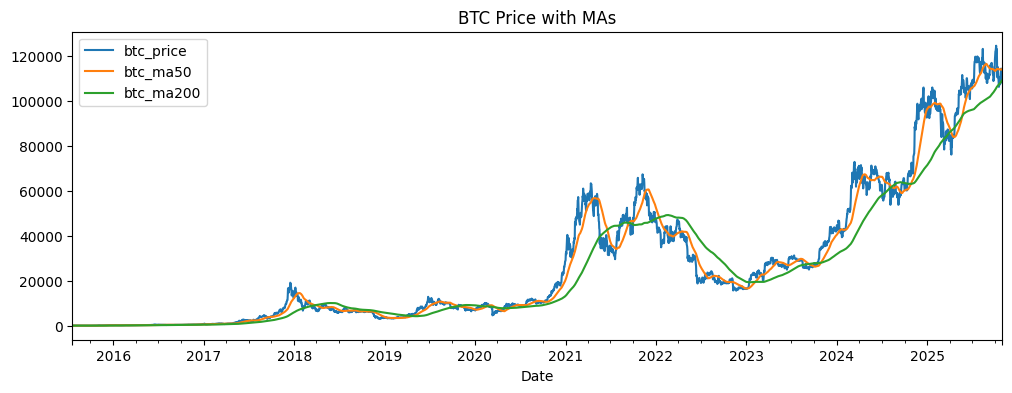

In [ ]:
df[['btc_price','btc_ma50','btc_ma200']].plot(figsize=(12,4), title='BTC Price with MAs')

<Axes: title={'center': 'BTC Daily Log Returns'}, xlabel='Date'>

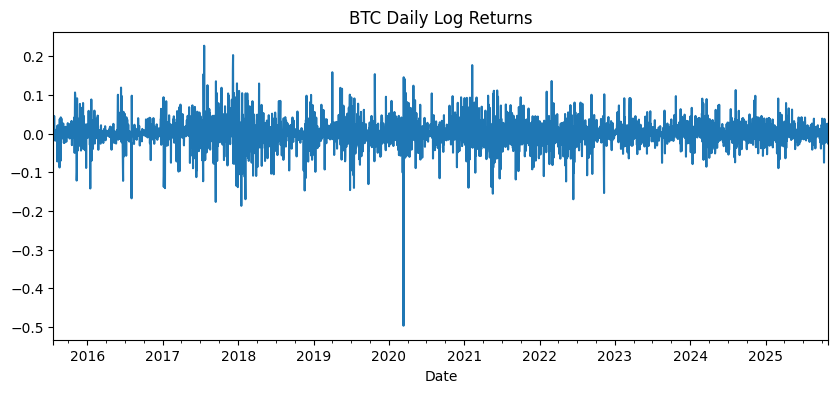

In [ ]:
df['btc_logret'].plot(figsize=(10,4), title='BTC Daily Log Returns')

Text(0.5, 1.0, 'Correlation Heatmap')

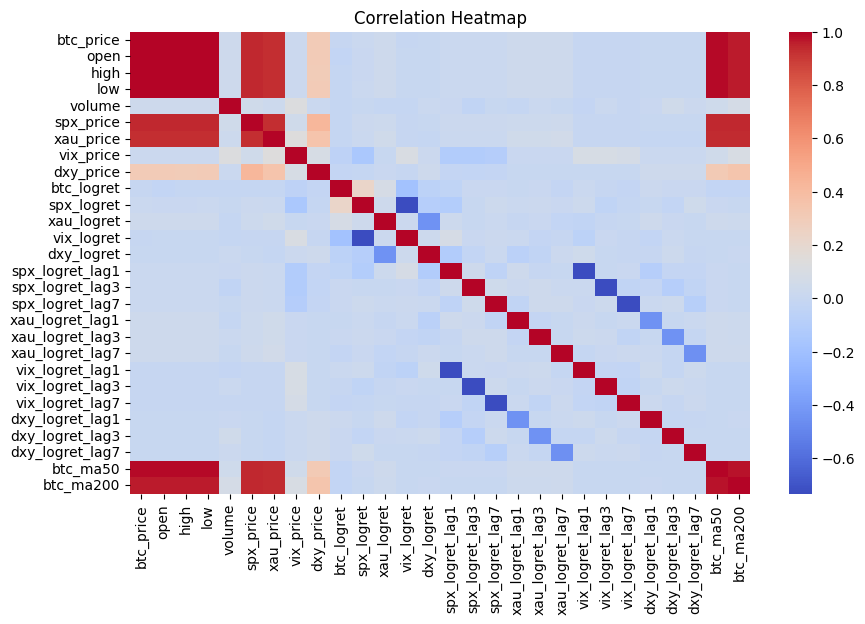

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")

array([[<Axes: title={'center': 'btc_logret'}>,
        <Axes: title={'center': 'spx_logret'}>],
       [<Axes: title={'center': 'xau_logret'}>,
        <Axes: title={'center': 'vix_logret'}>],
       [<Axes: title={'center': 'dxy_logret'}>, <Axes: >]], dtype=object)

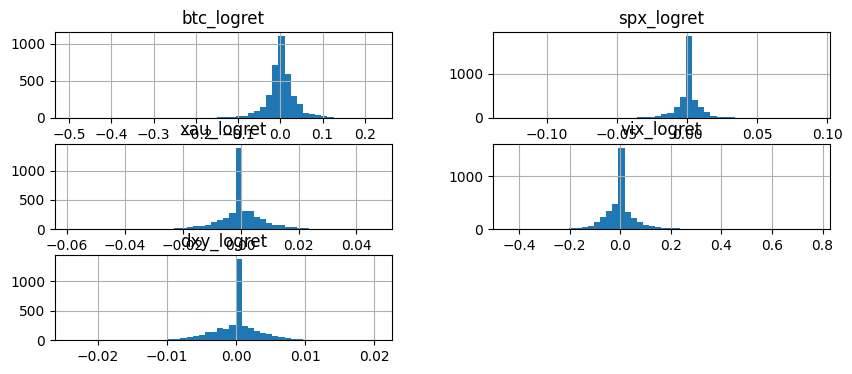

In [ ]:
df[['btc_logret','spx_logret','xau_logret', 'vix_logret', 'dxy_logret']].hist(bins=50, figsize=(10,4))

Export

In [ ]:
df.to_csv('btc_forecasting_dataset3.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3757 entries, 2015-07-20 to 2025-10-31
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   btc_price        3757 non-null   float64
 1   open             3757 non-null   float64
 2   high             3757 non-null   float64
 3   low              3757 non-null   float64
 4   volume           3757 non-null   float64
 5   spx_price        3757 non-null   float64
 6   xau_price        3757 non-null   float64
 7   vix_price        3757 non-null   float64
 8   dxy_price        3757 non-null   float64
 9   btc_logret       3757 non-null   float64
 10  spx_logret       3757 non-null   float64
 11  xau_logret       3757 non-null   float64
 12  vix_logret       3757 non-null   float64
 13  dxy_logret       3757 non-null   float64
 14  spx_logret_lag1  3757 non-null   float64
 15  spx_logret_lag3  3757 non-null   float64
 16  spx_logret_lag7  3757 non-null   float64
 